In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Import dataset
ai_salaries= pd.read_csv(r'C:/Users/ab-fv/OneDrive/Documentos/Achievement 6 DA/Modified Data/ai_salaries2.csv', index_col = False)

In [13]:
ai_salaries.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'benefits_score'],
      dtype='object')

In [ ]:
# Data checks

In [3]:
ai_salaries.shape

(15000, 16)

In [ ]:
# Check extreme values - salary

In [14]:
# Mean
ai_salaries['salary_usd'].mean()

115348.96513333333

In [6]:
# Median
ai_salaries['salary_usd'].median()

99705.0

In [7]:
# Max
ai_salaries['salary_usd'].max()

399095

In [15]:
# Clean extreme values - salary
salaries = ai_salaries[ai_salaries['salary_usd'] < 350000]

In [ ]:
# Check extreme values - years of experience

In [9]:
# Mean
ai_salaries['years_experience'].mean()

6.2532

In [10]:
# Median
ai_salaries['years_experience'].median()

5.0

In [11]:
# Max
ai_salaries['years_experience'].max()

19

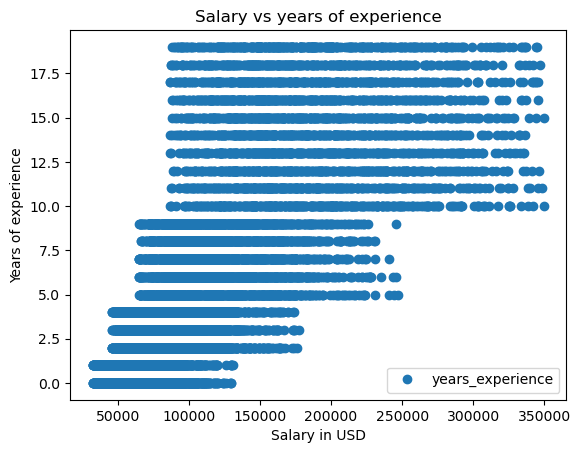

In [15]:
# Scatterplot

salaries.plot(x = 'salary_usd', y='years_experience',style='o')
plt.title('Salary vs years of experience')  
plt.xlabel('Salary in USD')  
plt.ylabel('Years of experience')  
plt.show()

In [ ]:
# Hypothesis
More years of experience do not guarantee more salary

In [16]:
# Reshape the variables

X = salaries['salary_usd'].values.reshape(-1,1)
y = salaries['years_experience'].values.reshape(-1,1)

In [17]:
X

array([[ 90376],
       [ 61895],
       [152626],
       ...,
       [189490],
       [ 79461],
       [ 56481]], dtype=int64)

In [18]:
y

array([[ 9],
       [ 1],
       [ 2],
       ...,
       [17],
       [ 1],
       [ 2]], dtype=int64)

In [19]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
# Regression object
regression = LinearRegression()

In [21]:
# Fitting regression onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predicting y values
y_predicted = regression.predict(X_test)

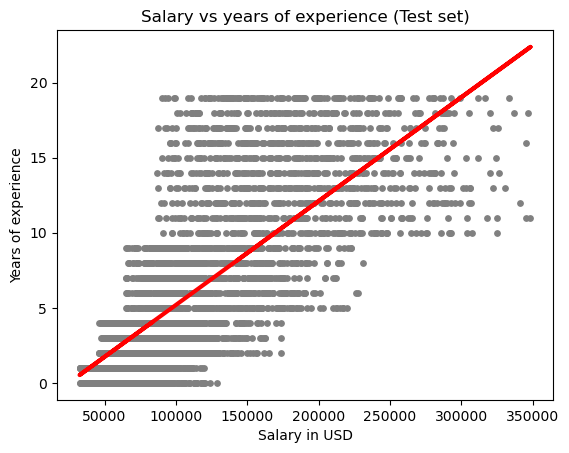

In [23]:
# Plot that shows the regression line on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Salary vs years of experience (Test set)')
plot_test.xlabel('Salary in USD')
plot_test.ylabel('Years of experience')
plot_test.show()

In [ ]:
# Interpretation: The line doesn't fit the data that well. There's a lot of points very far from the line

In [24]:
# Model performance statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.9168382e-05]]
Mean squared error:  13.997585185866152
R2 score:  0.5494679841058704


In [26]:
# Dataframe comparing predicted y values vs actual y values
y_values = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
y_values.head(20)

,Actual,Predicted
0,5,4.018134
1,0,2.293489
2,4,4.715143
3,1,1.431513
4,1,1.573170
5,5,4.586836
6,1,1.891621
7,14,4.817651
8,1,2.050293
9,0,1.720706


In [ ]:
# Predicted values are not so far off from actual values. Salary doesn't only depend on years of experience but on other variables too, like title, education, company size, etc.
# Possible bias: I removed extreme values in the salary column, which could have fitted the higher years of experience better